Tarea Amazon, Bestsellers Beauty

In [ ]:
#importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [ ]:
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

In [ ]:
#Bestsellers in beauty
r = requests.get('https://www.amazon.in/gp/bestsellers/beauty/ref=zg_bs_nav_0', headers=headers)#, proxies=proxies)

In [ ]:
r

<Response [200]>

In [ ]:
content = r.content
content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [ ]:
soup = BeautifulSoup(content)
soup

In [ ]:
name = soup.find('div', attrs={'class':'_cDEzb_p13n-sc-css-line-clamp-3_g3dy1'})
name.text

'Dettol Original Germ Protection Bathing Soap Bar, 125g (Pack Of 5)'

In [ ]:
price = soup.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})
price.text

'₹270.00'

In [ ]:

no_pages = 1

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/beauty/ref=zg_bs_nav_0', headers=headers)#, proxies=proxies)
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.find_all('div', attrs={'class':'a-cardui _cDEzb_grid-cell_1uMOS expandableGrid p13n-grid-content'}):
        #print(d)
        name = d.find('div', attrs={'class':'_cDEzb_p13n-sc-css-line-clamp-3_g3dy1'})
        #n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('span', attrs={'class':'a-size-small'})
        price = d.find('span', attrs={'class':'_cDEzb_p13n-sc-price_3mJ9Z'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            #all1.append(n[0]['alt'])
            all1.append(name.text)
        else:
            all1.append("unknown-product")

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [ ]:
results = []
for i in range(1, no_pages+1):
  results.append(get_data(i))

In [ ]:
#mostrar una lista de todos los productos y su explicacion
results

[[['Dettol Original Germ Protection Bathing Soap Bar, 125g (Pack Of 5)',
   '4.5 out of 5 stars',
   '17,849',
   '₹270.00'],
  ['Cetaphil Face Wash Gentle Skin Cleanser for Dry to Normal, Sensitive Skin, 125 ml Hydrating Face Wash with Niacinamide, Vitamin B5',
   '4.3 out of 5 stars',
   '22,256',
   '₹283.00'],
  ['Dabur Amla Hair Oil - 550 ml | For Strong, Long and Thick hair | Nourishes Scalp | Controls Hair Fall, Strengthens Hair & Promotes Hair Growth',
   '4.3 out of 5 stars',
   '15,365',
   '₹179.00'],
  ['Minimalist Sunscreen SPF 50 Lightweight with Multi-Vitamins | No White Cast | Broad Spectrum PA ++++ | For Women & Men | 50g',
   '4.1 out of 5 stars',
   '10,991',
   '₹379.00'],
  ['Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ For UVA/B & Blue Light Protection, for Glowing & Well Protected Skin, Cream, 50G',
   '4.3 out of 5 stars',
   '5,508',
   '₹338.00'],
  ['Himalaya Purifying Neem Face Wash, 400 Ml',
   '4.4 out of 5 stars',
   '90,378',
   '₹297.00'],
  ['Nivea Fre

In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Nombre del Producto','Rating','Rating del Consumidor', 'Precio'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [ ]:
df

In [ ]:
df = df.drop_duplicates(subset=['Rating del Consumidor', 'Precio'])

In [ ]:
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'])

In [ ]:
df["Precio"] = df["Precio"].str.replace('₹', '')

In [ ]:
df["Precio"] = df["Precio"].str.replace(',', '')

In [ ]:
df['Precio'] = df['Precio'].apply(lambda x: x.split('.')[0])

In [ ]:
df['Precio'] = df['Precio'].astype(int)

In [ ]:
df["Rating del Consumidor"] = df["Rating del Consumidor"].str.replace(',', '')

In [ ]:
df['Rating del Consumidor'] = pd.to_numeric(df['Rating del Consumidor'], errors='ignore')

In [ ]:
df.dtypes

Nombre del Producto       object
Rating                   float64
Rating del Consumidor      int64
Precio                     int64
dtype: object

In [ ]:
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [ ]:
count_nan = len(df) - df.count()

In [ ]:
count_nan

Nombre del Producto      0
Rating                   0
Rating del Consumidor    0
Precio                   0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
data = df.sort_values(["Precio"], axis=0, ascending=False)[:10]
top_products = data.head(5)

In [ ]:
data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Creacion del grafico para los mejores productos

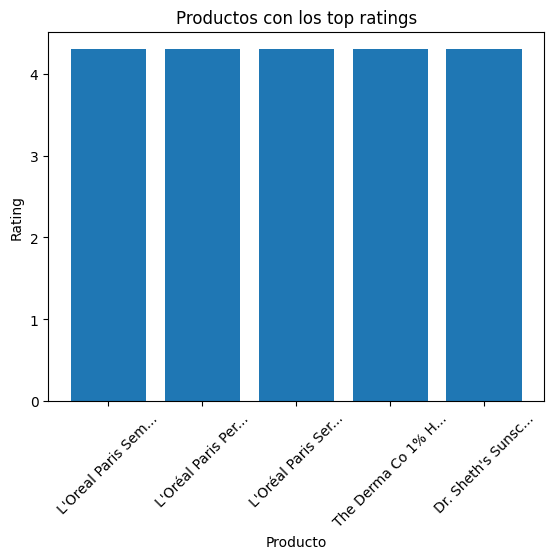

In [ ]:
data = df.sort_values(["Precio"], axis=0, ascending=False)[:10]
top_products = data.head(5)

plt.bar(top_products['Nombre del Producto'], top_products['Rating'])
plt.xlabel('Producto')
plt.ylabel('Rating')
plt.title('Productos con los top ratings')

# Ajustar los nombres de los productos en el eje x
plt.xticks(range(len(top_products)), [name[:17] + '...' if len(name) > 16 else name for name in top_products['Nombre del Producto']], rotation=45)

plt.show()

# Elegir un tema de interes

In [ ]:
r2 = requests.get('https://www.superseis.com.py/default.aspx', headers=headers)#, proxies=proxies)

In [ ]:
r2

<Response [200]>

In [ ]:
content = r2.content
content

In [ ]:
soup2 = BeautifulSoup(content)
soup2

In [ ]:
name2 = soup2.find('h2', attrs={'class':'product-title'})
name2.text

'\nSHAMPOO CLASICO JOHNSONS BABY 400ML\n'

In [ ]:
no_pages = 1

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r2 = requests.get('https://www.superseis.com.py/default.aspx', headers=headers)#, proxies=proxies)
    soup2 = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup2.find_all('div', attrs={'class':'product-item'}):
        #print(d)
        name2 = d.find('h2', attrs={'class':'product-title'})
        #n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        marca = d.find('div', attrs={'class':'product-brand'})
        price2 = d.find('span', attrs={'class':'price-label'})

        all1=[]

        if name2 is not None:
            #print(n[0]['alt'])
            #all1.append(n[0]['alt'])
            all1.append(name2.text)
        else:
            all1.append("unknown-product")

        if marca is not None:
            #print(rating.text)
            all1.append(marca.text)
        else:
            all1.append('-1')    

        if price2 is not None:
            #print(price.text)
            all1.append(price2.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [ ]:
results = []
for i in range(1, no_pages+1):
  results.append(get_data(i))

In [ ]:
results

In [ ]:
flatten = lambda l: [item for sublist in l for item in sublist]
df = pd.DataFrame(flatten(results),columns=['Nombre del Producto','Marca', 'Precio'])
df.to_csv('productos.csv', index=False, encoding='utf-8')

In [ ]:
df

In [ ]:
df['Precio'] = df['Precio'].astype(float)
df['Marca'] = df['Marca'].astype(str)

In [ ]:
df.dtypes

Nombre del Producto     object
Marca                   object
Precio                 float64
dtype: object

In [ ]:
count_nan = len(df) - df.count()

In [ ]:
count_nan

Nombre del Producto    0
Marca                  0
Precio                 0
dtype: int64

In [ ]:
marca = df.sort_values(["Marca"], axis=0, ascending=False)[:10]
marca.head(5)

,Nombre del Producto,Marca,Precio
23,\nPURE DE TOMATES NORTE 210GR\n,\nNORTE\n,3.25
1,\nALIMENTO PARA PERRO MASTER DOG ANIMAL PLANET...,\nMASTER DOG\n,26.50
3,\nLECHE DESCREMADA UAT LIGHT CALIDAD S6 1LT\n,\nMARCA EXCLUSIVA\r\n \r\n ...,6.95
14,\nGALLETITAS CRACKERS SALVADO BIANCA 130GR\n,\nMARCA EXCLUSIVA\n,3.75
5,\nPAN DE VIENA CALIDAD S6 480GR\n,\nMARCA EXCLUSIVA\n,6.30


<ipython-input-82-8d05113f1c61>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Precio'], df['Marca'], cmap='hot_r')
) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


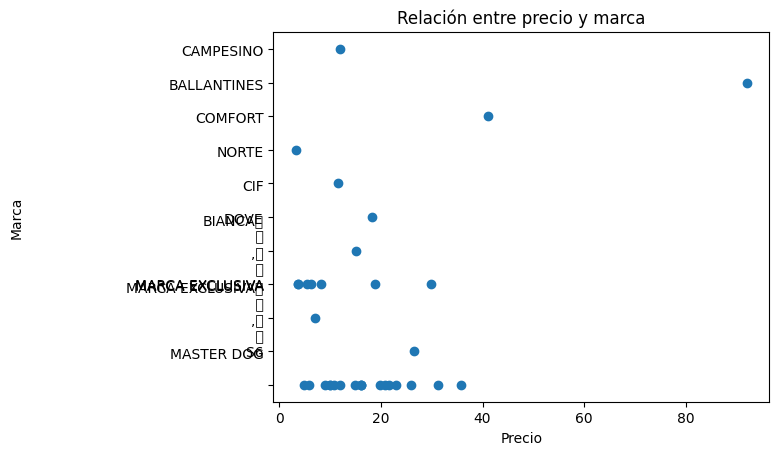

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.scatter(df['Precio'], df['Marca'], cmap='hot_r')
plt.xlabel('Precio')
plt.ylabel('Marca')
plt.title('Relación entre precio y marca')

# Mostrar el gráfico
plt.show()